In [117]:
#Import Libraries

import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Data

advertising = pd.read_csv('Advertising.csv')
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
#Change Column Name

advertising.rename(columns={'Unnamed: 0' : 'Market Number'},inplace=True)
advertising.head()

,Market Number,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
#Inspect Information about data

advertising.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Market Number  200 non-null    int64  
 1   TV             200 non-null    float64
 2   radio          200 non-null    float64
 3   newspaper      200 non-null    float64
 4   sales          200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 9.4 KB


In [7]:
#Brief Description

advertising.describe()

,Market Number,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


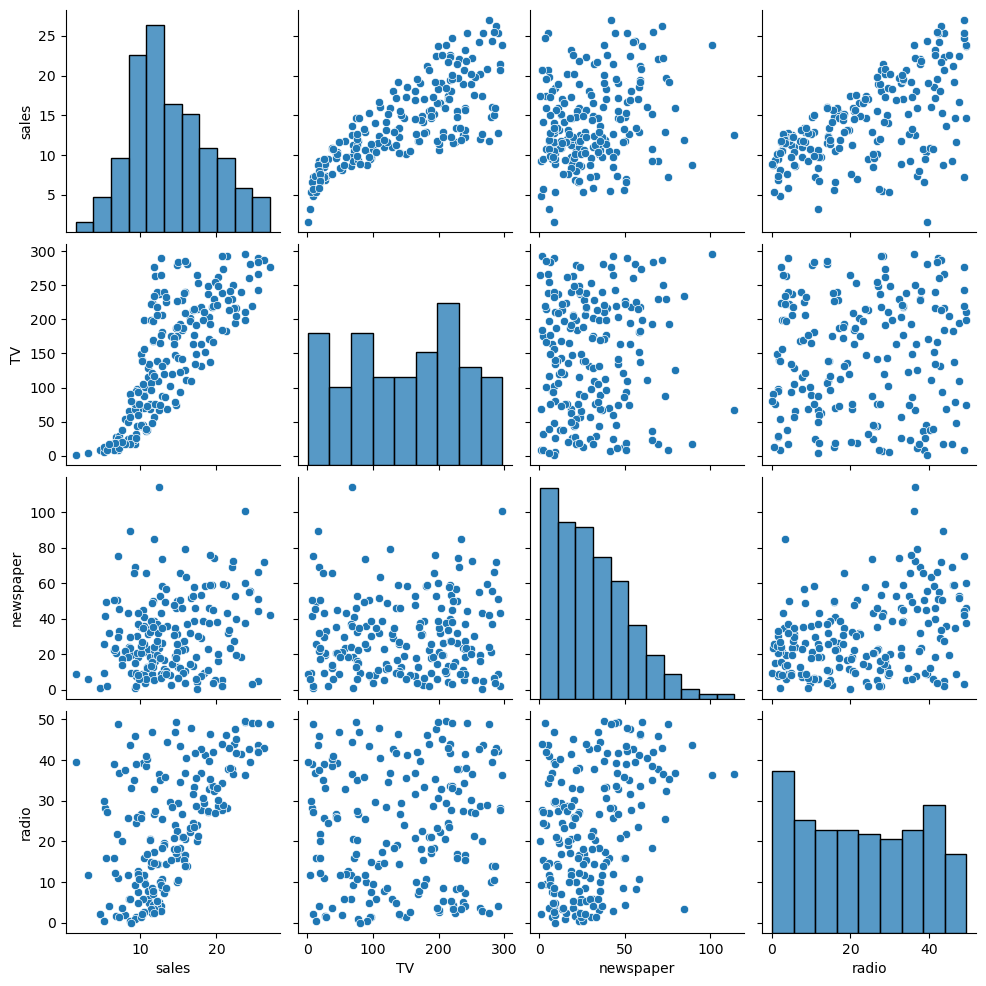

In [141]:
#Visualization of the relationships between the variables

cols=['sales','TV','newspaper','radio']
sns.pairplot(advertising[cols])

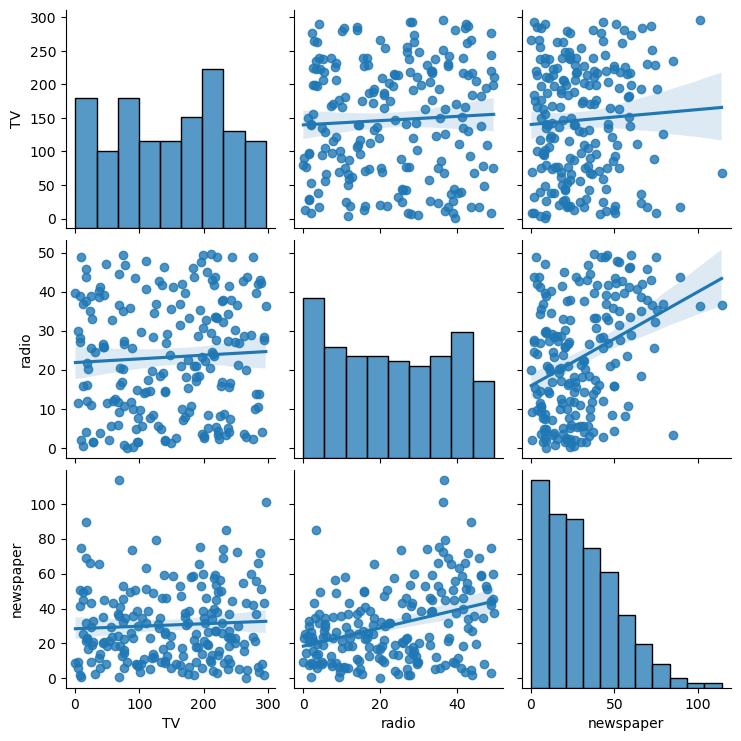

In [8]:
#Visualization of the relationships between each predictor

cols = ['TV','radio','newspaper']
sns.pairplot(data=advertising[cols],kind='reg')

<AxesSubplot:>

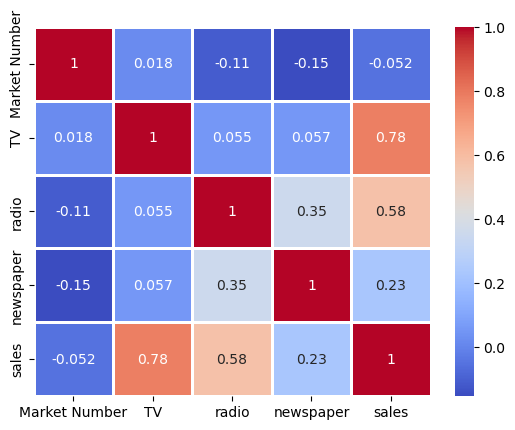

In [17]:
#To visualize correlation for better understanding of the relationships

sns.heatmap(data=advertising.corr(numeric_only=True),cmap='coolwarm',linecolor='white',linewidth=1,annot=True)

#Observation: Newspaper budget and radio budget have the highest correlation between predictors

In [93]:
#Regressing sales onto each predictor seperately (Simple Linear Regression)

#Regressing sales onto TV

X = np.array(advertising['TV']).reshape((-1,1))
y = advertising['sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=101)
lm_TV = LinearRegression()
lm_TV.fit(X_train,y_train)

LinearRegression()

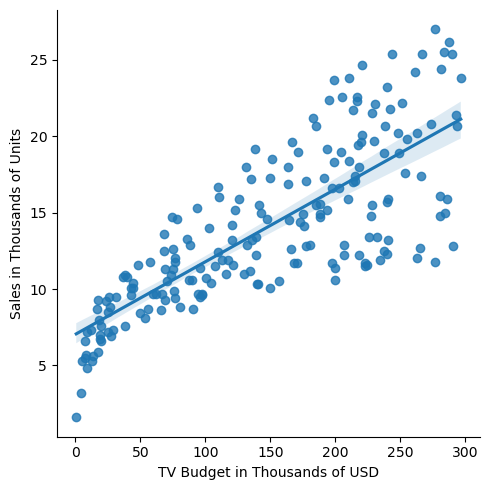

In [94]:
s = sns.lmplot(x='TV',y='sales',data=advertising)
s.set_axis_labels('TV Budget in Thousands of USD','Sales in Thousands of Units')
s

#Observations: The linear regressions appears to describe the relationship pretty good. Variability increases the
#more money is spent on TV advertising. However the model fit looks pretty decent at first glance

In [95]:
#Functions for calculating slope and intercept

def calculate_slope(x,y,x_mean,y_mean):
    return np.sum((x-x_mean)*(y-y_mean))/np.sum(np.square(x-x_mean))
def calculate_intercept(slope,x_mean,y_mean):
    return y_mean - slope*x_mean

In [147]:
#Information about linear model

#1.Estimating Coefficients

lm_TV_slope = calculate_slope(advertising['TV'],y,np.mean(advertising['TV']),np.mean(y))
intercept = calculate_intercept(slope,np.mean(advertising['TV']),np.mean(y))
slope,intercept,lm_TV.coef_

#Observations: Per one unit increase in TV budegt there's an estimated 40 unit increase in sales if all other 
#predictors were fixed, with no TV budget sales are 7032 units on average

(0.054693098472273355, 5.980290067890747, array([0.20574997]))

In [97]:
#Overall Information on model

import statsmodels.api as sm
X = advertising[['TV']]
y = advertising['sales']
X = sm.add_constant(X) # add a constant term to the model
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.47e-42
Time:                        15:02:10   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
#2.Assesing Coefficient's Estimates Accuracy

SE_slope = np.sqrt((RSE**2)/(np.sum(np.square(advertising['TV']-np.mean(advertising['TV'])))))
SE_intercept = np.sqrt((RSE**2)*(((np.mean(advertising['TV'])**2)/(np.sum(np.square(advertising['TV']-
                                                                                 np.mean(advertising['TV'])))))
                                +1/len(y)))
confidence_interval_slope = [slope-2*SE_slope,slope+2*SE_slope]
confidence_interval_intercept = [intercept-2*SE_intercept,intercept+2*SE_intercept]

t_statistic = slope/SE_slope

print('SE intercept: ' + str(SE_intercept))
print('SE slope: ' + str(SE_slope))
print('Confidence interval slope: ' + str(confidence_interval_slope))
print('Confidence interval intercept: ' + str(confidence_interval_intercept))
print('T Statistic: ' + str(t_statistic))

#Observations: The average sales with no money spent on TV advertising could differ from the estimated intercept
#by approximately 458 units and the average increase per one unit increase in TV advertising budget (100$) may 
#differ by an estimated 2 units. With 95% the true value for the intercept lies within the intercept confidence
#interval such that the average sales in the absence of TV advertising will be in the range of 6130-7948 units
#and with 95% the true increase per one unit increase in TV budget will be between 42-53 units. Since our 
#t statistic is way far from 0 and the p value from the previous observation is very low, we can reject the 
#null hypothesis and therefore conclude that there actually is a relationship between sales and TV advertising

SE intercept: 0.4579939302222462
SE slope: 0.002691494510950083
Confidence interval slope: [0.04215365141111957, 0.0529196294549199]
Confidence interval intercept: [6.1166056886832045, 7.9485814095721885]
T Statistic: 17.66180099555156


In [119]:
#3.Assesing Model's Accuracy

predictions = lm_TV.predict(advertising[['TV']])
RSS = np.sum(np.square(y-predictions))
RSE = np.sqrt(RSS/(len(y)-2))
TSS = np.sum(np.square(y-np.mean(y)))
R_squared = (TSS-RSS)/TSS
correlation = advertising[['TV','sales']].corr() #The squared correlation is equal to R squared

print('RSS: ' + str(RSS))
print('RSE: ' + str(RSE))
print('TSS: ' + str(TSS))
print('R squared: ' + str(R_squared)) #or use metrics.explained_variance_score(y,predictions)
print('Correlation: ' + str(correlation))

#Observations: An RSE of 3.26 is an good indication that the model fit is somewhat accurate and that we have 
#an unexplained variability of around 3260 units (The response will deviate from the population regression line 
#with an average amount of 3260 units). The mean of sales is 14.000 units so an RSE of 3.26 means that no matter
#how accurate our coefficients are sales will be off by about 12.6%. Around 60% of the variability is explained
#by the given data. The linear model may be the best fit to describe the relationship between this 
#predictor and response an R squared of 60% may not be bad 

RSS: 2103.917579868048
RSE: 3.2597310261691743
TSS: 5417.14875
R squared: 0.6116190127014607
Correlation:              TV     sales
TV     1.000000  0.782224
sales  0.782224  1.000000


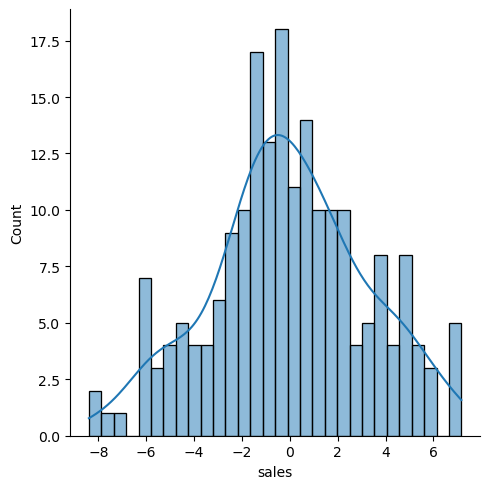

In [121]:
#Visualization of the residual's distribution

sns.displot((y-predictions),bins=30,kde=True)

#Observations: The residuals are near normally distributed indicating that there is no big variability in the 
#predictions

In [123]:
#Regressing sales onto radio

X = np.array(advertising['radio']).reshape((-1,1))
y = advertising['sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=101)
lm_radio = LinearRegression()
lm_radio.fit(X_train,y_train)

LinearRegression()

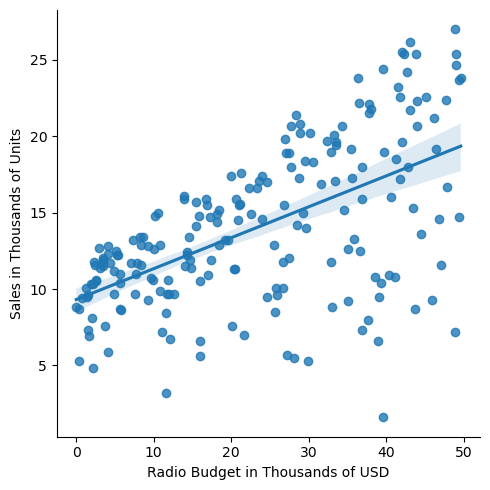

In [125]:
r = sns.lmplot(x='radio',y='sales',data=advertising)
r.set_axis_labels('Radio Budget in Thousands of USD','Sales in Thousands of Units')
r

#Observations: The residuals are increasing the more we increase our radio budget and the relationship starts
#to be hard to describe with a simple linear regression

In [146]:
#Information about linear model

#1.Estimating Coefficients

lm_radio_slope = calculate_slope(advertising['radio'],y,np.mean(advertising['radio']),np.mean(y))
intercept = calculate_intercept(slope,np.mean(advertising['radio']),np.mean(y))
slope,intercept,lm_radio.coef_

#Observations: Per one unit increase in radio budegt there's an estimated 200 unit increase in sales if all other 
#predictors were fixed, with no radio budget sales are 9311 units on average

(0.054693098472273355, 12.750119757141032, array([0.20574997]))

In [129]:
#Overall Information on model

import statsmodels.api as sm
X = advertising[['radio']]
y = advertising['sales']
X = sm.add_constant(X) # add a constant term to the model
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           4.35e-19
Time:                        15:53:49   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
#2.Assesing Coefficient's Estimates Accuracy

SE_slope = np.sqrt((RSE**2)/(np.sum(np.square(advertising['radio']-np.mean(advertising['radio'])))))
SE_intercept = np.sqrt((RSE**2)*(((np.mean(advertising['radio'])**2)/(np.sum(np.square(advertising['radio']-
                                                                                 np.mean(advertising['radio'])))))
                                +1/len(y)))
confidence_interval_slope = [slope-2*SE_slope,slope+2*SE_slope]
confidence_interval_intercept = [intercept-2*SE_intercept,intercept+2*SE_intercept]

t_statistic = slope/SE_slope

print('SE intercept: ' + str(SE_intercept))
print('SE slope: ' + str(SE_slope))
print('Confidence interval slope: ' + str(confidence_interval_slope))
print('Confidence interval intercept: ' + str(confidence_interval_intercept))
print('T Statistic: ' + str(t_statistic))

#Observations: The average sales with no money spent on radio advertising could differ from the estimated 
#intercept
#by approximately 563 units and the average increase per one unit increase in radio advertising budget (1000$) 
#may differ by an estimated 20 units. Standard Errors here are clearly larger than those of the TV coefficients
#With 95% the true value for the intercept lies within the intercept confidence
#interval such that the average sales in the absence of radio advertising will be in the range of 8183-10439 units
#and with 95% the true increase per one unit increase in radio budget will be between 161-243 units. Since our 
#t statistic is far from 0 and the p value from the previous observation is very low, we can reject the 
#null hypothesis and therefore conclude that there actually is a relationship between sales and radio advertising

SE intercept: 0.5639746906418083
SE slope: 0.02045025766768458
Confidence interval slope: [0.16159526805707053, 0.24339629872780888]
Confidence interval intercept: [8.183688713874666, 10.4395874764419]
T Statistic: 9.901869535483788


In [130]:
#3.Assesing Model's Accuracy

predictions = lm_radio.predict(advertising[['radio']])
RSS = np.sum(np.square(y-predictions))
RSE = np.sqrt(RSS/(len(y)-2))
TSS = np.sum(np.square(y-np.mean(y)))
R_squared = (TSS-RSS)/TSS
correlation = advertising[['radio','sales']].corr() #The squared correlation is equal to R squared

print('RSS: ' + str(RSS))
print('RSE: ' + str(RSE))
print('TSS: ' + str(TSS))
print('R squared: ' + str(R_squared)) #or use metrics.explained_variance_score(y,predictions)
print('Correlation: ' + str(correlation))

#Observations: An RSE of 4.28 is an okay indication that the model fit is somewhat accurate and that we have 
#an unexplained variability of around 4280 units (The response will deviate from the population regression line 
#with an average amount of 4280 units). The mean of sales is 14.000 units so an RSE of 4.28 means that no matter
#how accurate our coefficients are sales will be off by about 30.6%. Around 33% of the variability is explained
#by the given data. The linear model appears not be the best fit to describe the relationship between this 
#predictor and response

RSS: 3632.303161396887
RSE: 4.283102317433059
TSS: 5417.14875
R squared: 0.32948063104287345
Correlation:           radio     sales
radio  1.000000  0.576223
sales  0.576223  1.000000


In [133]:
#Regressing sales onto newspaper

X = np.array(advertising['newspaper']).reshape((-1,1))
y = advertising['sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=101)
lm_newspaper = LinearRegression()
lm_newspaper.fit(X_train,y_train)

LinearRegression()

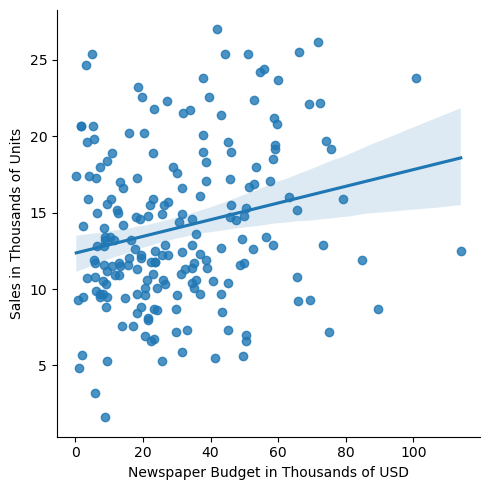

In [134]:
n = sns.lmplot(x='newspaper',y='sales',data=advertising)
n.set_axis_labels('Newspaper Budget in Thousands of USD','Sales in Thousands of Units')
n

#Observations: linear regression may be a bad way to describe the relationship between sales and newspaper ads'
#budgeting. The light blue highlighted interval displays the big amount of error indicating that there might be 
#little to no pattern at all between the newspaper advertising budget and the sales

In [145]:
#Information about linear model

#1.Estimating Coefficients

lm_newspaper_slope = calculate_slope(advertising['newspaper'],y,np.mean(advertising['newspaper']),np.mean(y))
intercept = calculate_intercept(slope,np.mean(advertising['newspaper']),np.mean(y))
slope,intercept,lm_newspaper.coef_

#Observations: Per one unit increase in newspaper budegt there's an estimated 50 unit increase in sales 
#if all other 
#predictors were fixed, with no newspaper budget sales are 12351 units on average indicating that newspaper
#advertising has the least effect on sales compared to TV and radio advertising. It also shows that with no
#newspaper budgeting sales are around the mean (14000)

(0.054693098472273355, 12.35140706927816, array([0.06102883]))

In [136]:
#Overall Information on model

import statsmodels.api as sm
X = advertising[['newspaper']]
y = advertising['sales']
X = sm.add_constant(X) # add a constant term to the model
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 31 Mar 2023   Prob (F-statistic):            0.00115
Time:                        16:25:16   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
#2.Assesing Coefficient's Estimates Accuracy

SE_slope = np.sqrt((RSE**2)/(np.sum(np.square(advertising['newspaper']-np.mean(advertising['newspaper'])))))
SE_intercept = np.sqrt((RSE**2)*(((np.mean(advertising['radio'])**2)/(np.sum(np.square(advertising['newspaper']-
                                                                                 np.mean(advertising['newspaper']
                                                                                        )))))
                                +1/len(y)))
confidence_interval_slope = [slope-2*SE_slope,slope+2*SE_slope]
confidence_interval_intercept = [intercept-2*SE_intercept,intercept+2*SE_intercept]

t_statistic = slope/SE_slope

print('SE intercept: ' + str(SE_intercept))
print('SE slope: ' + str(SE_slope))
print('Confidence interval slope: ' + str(confidence_interval_slope))
print('Confidence interval intercept: ' + str(confidence_interval_intercept))
print('T Statistic: ' + str(t_statistic))

#Observations: The average sales with no money spent on newspaper advertising could differ from the estimated 
#intercept by approximately 528 units and the average increase per one unit increase in newspaper 
#advertising budget (1000$) 
#may differ by an estimated 16 units. Standard Errors here are clearly larger than those of the TV coefficients
#and are very close to those of the radio coefficients. However radio advertising clearly generates more sales so
#high standard errors in the coefficients of newspaper advertising is problematic
#With 95% the true value for the intercept lies within the intercept confidence
#interval such that the average sales in the absence of newspaper advertising will be in the range of 11294-13408 
#units
#and with 95% the true increase per one unit increase in radio budget will be between 21-87 units. Our 
#t statistic is not far from 0 and the p value from the previous observation is 0.001, therefore
#we can't easily reject the null hypothesis. 

SE intercept: 0.528469076439774
SE slope: 0.01660284839359041
Confidence interval slope: [0.021487401685092535, 0.08789879525945418]
Confidence interval intercept: [11.294468916398612, 13.408345222157708]
T Statistic: 3.2941997165611547


In [137]:
#3.Assesing Model's Accuracy

predictions = lm_newspaper.predict(advertising[['newspaper']])
RSS = np.sum(np.square(y-predictions))
RSE = np.sqrt(RSS/(len(y)-2))
TSS = np.sum(np.square(y-np.mean(y)))
R_squared = (TSS-RSS)/TSS
correlation = advertising[['newspaper','sales']].corr() #The squared correlation is equal to R squared

print('RSS: ' + str(RSS))
print('RSE: ' + str(RSE))
print('TSS: ' + str(TSS))
print('R squared: ' + str(R_squared)) #or use metrics.explained_variance_score(y,predictions)
print('Correlation: ' + str(correlation))

#Observations: An RSE of 5.1 is a bit problematic since we have 
#an unexplained variability of around 5100 units (The response will deviate from the population regression line 
#with an average amount of 5100 units). The mean of sales is 14.000 units so an RSE of 5.1 means that no matter
#how accurate our coefficients are sales will be off by about 36%. Around 49% of the variability is explained
#by the given data. The linear model appears to be a bad fit to describe the relationship between this 
#predictor and response

RSS: 5151.6247272660385
RSE: 5.100814317671624
TSS: 5417.14875
R squared: 0.049015457205963155
Correlation:            newspaper     sales
newspaper   1.000000  0.228299
sales       0.228299  1.000000


In [143]:
#Multiple Linear Regression

X = advertising[['TV','radio','newspaper']]
y = advertising['sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [171]:
#Coefficients

coefficients = lm.coef_
mul_lin_reg = pd.DataFrame(data=coefficients,index=X.columns,columns=['Coefficients'])
print("Multiple Linear Regression Coefficients: \n" , mul_lin_reg, '\n')
simp_lin_reg = pd.DataFrame(data=[lm_TV_slope,lm_radio_slope,lm_newspaper_slope],index=X.columns,columns=
                           ['Coefficients'])
print("Simple Linear Regression Coefficients: \n" , simp_lin_reg)
# Observations: The coefficients of the simple linear regression of TV and radio didn't differ that much from the
# from the coefficients of the multiple linear regression. However the slope of the newspaper predictor 
# experienced a big downfall. The negative slope displays that there is in fact (according to estimates) a loss
# in sales from newspaper advertising when taking all predictors into consideration. Does it make sense that
# the simple lm model shows that there is a relation (positive) between newspaper ads and sales and multiple lm 
# model shows otherwise?
 

Multiple Linear Regression Coefficients: 
            Coefficients
TV             0.045207
radio          0.173379
newspaper     -0.012757 

Simple Linear Regression Coefficients: 
            Coefficients
TV             0.047537
radio          0.202496
newspaper      0.054693


<AxesSubplot:>

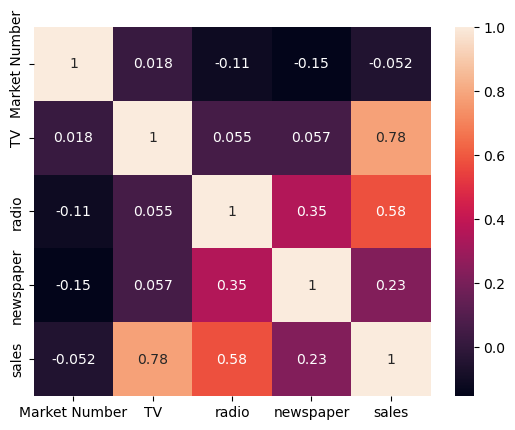

In [173]:
#Correlation map 

sns.heatmap(advertising.corr(),annot=True)

#Observations: This matrix shows that there is a correlation between newspaper advertising and radio advertising
#of 0.35. This indicates that markets with high newspaper advertising have also high radio advertising. Could it
#be possible that newspaper advertising takes 'credit' for radio advertising? The slope terms in both models have
#proven that there is in fact a positive relationship between radio advertising and sales. However newspaper
#advertising has a negative slope (and near 0) in the multiple lm model. One could assume that in the markets
#with high radio advertising the sales that are generated are also being associated with newspaper advertising
#in the simple lm model since this model only analyzes the relationship between newspaper advertising and sales
#without taking other predictors into consideration. 

In [203]:
#Perform Hypothesis Test

predicitions = lm.predict(X)
TSS = np.sum(np.square(y - np.mean(y)))
RSS = np.sum(np.square(y - predicitions))
F_statistic = (((TSS-RSS)/len(X.columns)))/(RSS/(len(y)-len(X.columns)-1))

print('F Statistic: ', F_statistic)
print('RSS: ', RSS)

#The estimated F statistic may not fully correspond with the computed one in the table below but since this F stat
#is way larger than 1 it provides compelling evidence that at least one of the predictors has a relationship to
#our response

F Statistic:  -60.274332025447826
RSS:  69958.54783598126


In [198]:
#Overall Information on model

import statsmodels.api as sm
z = advertising[['TV','radio','newspaper']]
zz = advertising['sales']
z = sm.add_constant(z) # add a constant term to the model
model = sm.OLS(zz, z).fit()
model.summary()

#Observation: Another piece of evidence that shows that there is no relationship between newspaper advertising
#and sales. We have a t value of -0.177 which is very close to 0 and a p value of 0.860 which indicates that 
#the any apparent association between newspaper advertising and sales is due to some random variation of the data
#and that the given evidence is not enough to reject the null hypothesis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.58e-96
Time:                        11:56:45   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
#Variable Selection for determining the subset of predictors which are associated with the response

#Mixed Selection

#Find predictor with smallest RSS for the first step

RSS1 = np.sum(np.square(advertising['sales'] - lm_TV.predict(advertising[['TV']])))
RSS2 = np.sum(np.square(advertising['sales'] - lm_TV.predict(advertising[['radio']])))
RSS3 = np.sum(np.square(advertising['sales'] - lm_TV.predict(advertising[['newspaper']])))
RSS1,RSS2,RSS3

(171183.23451405886, 3632.303161396887, 7906.921903000864)

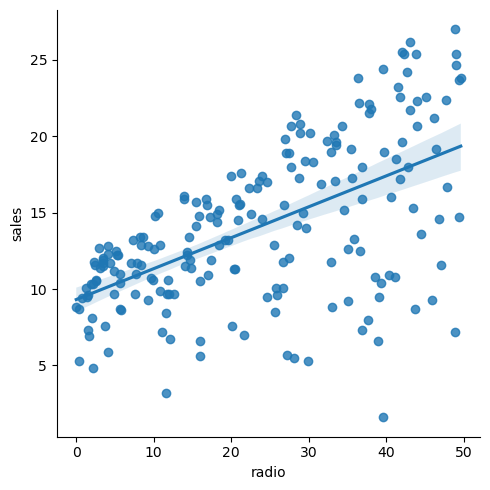

In [186]:
#Radio has best fit

sns.lmplot(x='radio',y='sales',data=advertising)

In [193]:
#Finding the best fit to the model

X1 = advertising[['TV','radio']]
X2 = advertising[['radio','newspaper']]
y = advertising['sales']

X1_train,X1_test,y_train,y_test = train_test_split(X1,y,train_size=0.3,random_state=101)
X2_train,X2_test,y_train,y_test = train_test_split(X2,y,train_size=0.3,random_state=101)


lm_temp1 = LinearRegression()
lm_temp1.fit(X1_train,y_train)

lm_temp2 = LinearRegression()
lm_temp2.fit(X2_train,y_train)

p1 = lm_temp1.predict(X1)
p2 = lm_temp2.predict(X2)

RSS1 = np.sum(np.square(advertising['sales'] - p1))
RSS2 = np.sum(np.square(advertising['sales'] - p2))

RSS1,RSS2

#Observations: Adding the tv advertising predictor results in the least RSS, since the RSS of radio as the only
#predictor was around 3632. However if we add the 3 predictors in our linear model we get an RSS of 70000 and 
#the p value of newspaper advertising exceeds the threshold of 0.05 and therefore the important variables that
#have a strong association with the sales are in fact TV and radio advertising

(581.8907213003649, 3727.44201662002)

In [199]:
import statsmodels.api as sm
X = advertising[['TV','radio']]
y = advertising['sales']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

#Observations: As we see we have an F-statistic of 860 which is enough evidence to reject the null hypothesis 
#(that there is at least one predictor that is associated with the response) and we have an explained variability
#of 90% which implies that our model is accurate and therefore this model can be used reliably to make predictions
#As we can see from previous models using one predictor our R squared value never exceeded 60% which indicates
#that there was still some data that can be used to reduce unexplained variability
#One very important observation is also the R squared value of the model with the three predictors! The R squared
#value is also 0.897. That is due to the fact that an increase in predictors leads to an increase in the R squared
#value because the RSS value will always decrease in the training data when another variable is added. However
#there is little to no increase in the R squared value when adding newspaper to the model which underlines the 
#unimportance of newspaper advertising

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           4.83e-98
Time:                        11:56:51   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
#Now we can add an interaction term to see if a one unit increase in radio advertising can have an effect on the
#effectiveness of TV advertising. 

from sklearn.preprocessing import PolynomialFeatures

X = advertising[['radio','TV']]
y = advertising['sales']

# create polynomial features up to degree 1 (i.e., linear features)
poly = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly.fit_transform(X)

# add interaction term between x1 and x2
X_poly_interaction = np.column_stack((X_poly, advertising['TV']*advertising['radio']))

# fit linear regression model with interaction term
model_interaction = LinearRegression().fit(X_poly_interaction, y)

In [209]:
import statsmodels.api as sm
X = sm.add_constant(X_poly_interaction)
model = sm.OLS(y,X).fit()
model.summary()

#Observations: This model displays the relationship between TV and radio advertising and sales after adding an
#interaction term. We can clearly see that this model outperformed all previous models reaching an R squared of
#96.8%, indicating that we have 3.2% of the variance left unexplained. After creating the new model containing 
#the interaction term, 69% ((96.8-89.7)/100-89.7) of the unexplained variability in the additive model has been 
#explained. Our linear model can be displayed through the term (sales = x0 + (x1 + x3*radio) * TV + x2 * radio)
#That mean an increase of 1000$ in TV advertising is associated with an increase of sales of (x1 + x3 * radio) *
#1000 units = 19 + 1.1 * radio units. This shows that in fact the increase of TV advertising budget has an effect
#on the effectiveness of radio advertising and vice versa.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          6.68e-146
Time:                        12:49:35   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.000       6.261       7.239
x1             0.0289      0.009      3.241      0.001       0.011       0.046
x2             0.0191      0.002     12.699      0.000       0.016       0.022
x3             0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

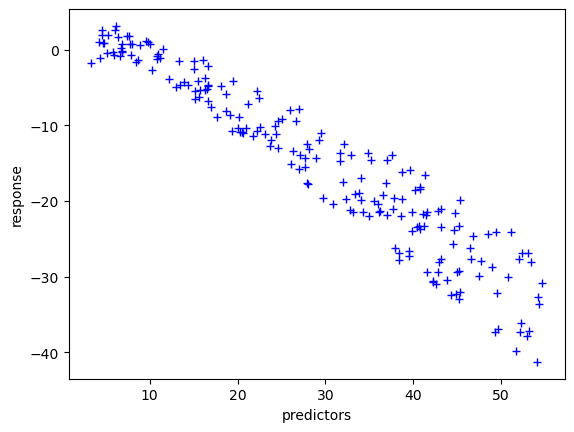

In [247]:
#Creating residual plots to identify non-linearity or outliers

y = advertising['sales']
lm_model = model_interaction
predictions = lm_model.predict(X_poly_interaction)
residuals = (y-predicitions)

plt.xlabel('predictors')
plt.ylabel('response')
plt.plot(predicitions,residuals,'b+')

#Observations: The residual plot displays that in fact a linear model is a good description of the relationship
#between the predictors and the response since there is no U-shape or curved pattern and the distance between
#the data points increases with the increase of the predictors values


#and shows no evidence of any outliers or high leverage poin

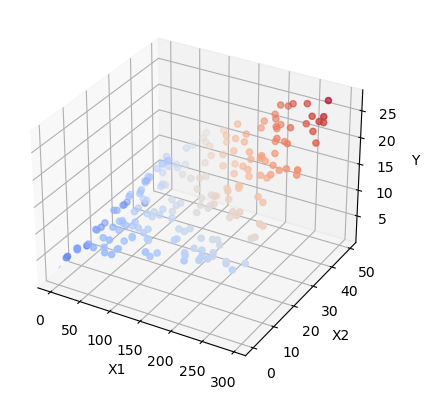

In [225]:
from mpl_toolkits import mplot3d
X1 = advertising['TV']
X2 = advertising['radio']
Y = advertising['sales']

A = np.column_stack((np.ones(len(X1)), X1, X2))
beta_hat = np.linalg.lstsq(A, Y, rcond=None)[0]

x1_grid, x2_grid = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
X_grid = np.column_stack((np.ones(100), x1_grid.ravel(), x2_grid.ravel()))

y_pred = np.dot(X_grid, beta_hat)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X1, X2, Y, c=Y, cmap='coolwarm')
ax.plot_surface(x1_grid, x2_grid, y_pred.reshape(x1_grid.shape), alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [243]:
df = pd.DataFrame({'predicted':model_interaction.predict(X_poly_interaction),'x1':advertising['TV'],'x2':
                  advertising['radio'],'residuals':y-model_interaction.predict(X_poly_interaction)})

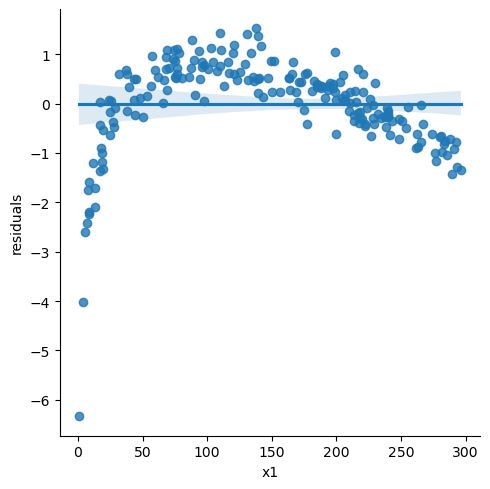

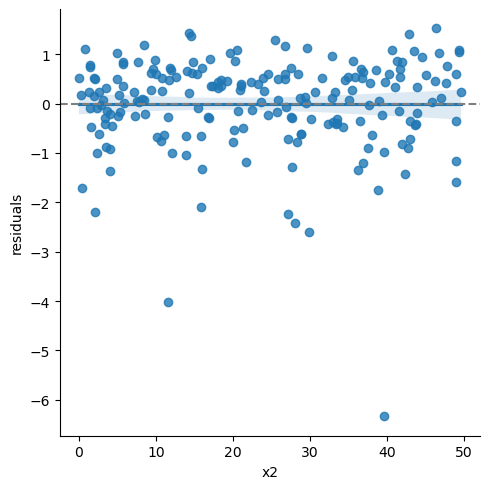

In [245]:
residuals = (advertising['sales']-model_interaction.predict(X_poly_interaction))
sns.lmplot(x='x1', y='residuals', data=df)
sns.lmplot(x='x2', y='residuals', data=df)
